# Final Project Notebook

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('[put our youtube embed # here]')

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
from math import exp, sin, pi, sqrt
from scipy.special import erfc
from scipy.sparse import spdiags

# Evaporation of Lakes - A Climatogical Model
Chelsea Bekemeier
<br> David Clark
<br> Kevin Pinder

# Introduction

<br> It is known that evaporation occurs in lakes and leads to direct water loss. In the science community, it is a goal to understand the rate of evaporation within lakes as well as how climate complicates the issue further. By understanding climatic conditions and the rate of evaporation, we can use many types of models like an eddy diffusion model to estimate the fluctuation in size of a particular lake.

Evaporation in a lake occurs when “there is a vapor pressure between a lake surface and the overlying atmosphere and sufficient energy is available” (Hosteler and Bartlen 1990). The air must be saturated between the lake and surface boundary layer. The key to help determine evaporation is having an accurate estimate of lake surface temperature because saturation vapor pressure is a function of temperature.

Where climatic conditions come into play regarding evaporation of a lake are the seasonal changes and how the strength of a winter or summer could change the thermal structure and evaporation of both shallow and deep lakes. Essentially, the lake surface temperature of shallow lakes can be estimated by a surface energy balance model where the net radiative forcing and air temperature of the lake are known. With deeper lakes, there can be an increase in evaporation due to “a significant amount of heat” being stored in the winter months and then released during the fall. Deeper lakes further complicate the calculation on how much the lake size fluctuates over some time scale (typically long). You need to account for the flux of heat into or out of the lake during seasonal cycles.

We will be using the forward time centered space method of the paramterized 1D model. 
<br>



# Models

## 1D Statrification Eddy-Diffusion Model:

<br><center> 1D Statrification Equation 
<br>
<br>
 
(1) $$ \frac{\partial T}{\partial t} = \frac{1}{A(z)}\frac{\partial}{\partial z}\Bigg[A(z)[k_m+K(z,t)]\frac{\partial T}{\partial z}\Bigg]\frac{1}{A(z)}\frac{1}{C_w}\frac{\partial [\phi A(z)]}{\partial z} $$
  
<br><center> Where $ T $ is water temperature in &deg; C, $ t $ is time in days <br> $ z $ is lake depth in m, $ A(z) $ is lake area in m^2 <br> $ \kappa _m $ is the molecular diffusion of water in $ \frac {m^2}{d} $ <br> $ K(z,t) $ is eddy diffusivity in $ \frac {m^2}{d} $ <br> $ C_w $ is the volumetric heat capacity of water in $\frac{J}{m^3 \circ C}$
<br> 

<br><center> Where $\phi$ is the heat source term (penetrating solar radiaton) in $ \frac {W}{m^2} $ represented by the following: 
<br>    

 $$  \phi = (1-\beta)K*e^{\eta z} $$

<br><center> Where $ \beta $ is surface layer shortwave radiation absorption <br> $ \eta $ is the light extinction coefficient for water in $ \frac {1}{m} $ <br> $ K^* $ is the net shortwave radiation at the lake surfrace in $ \frac {W}{m^2} $ <br> Here, we make the assumption that 40% of shortwave radiation is absorbed at the sufrace and the remaining is absorbed at depth.  
<br> 
    
<br><center> Sufrace boundary condition takes 1D equation with balance of heat energy at lake surface: 
<br>    
    
(2) $$ \kappa _m + K(z,t) \frac{\partial T}{\partial z} = K^* + L^*_d - L_u + Q_e + Q_h  $$
    
<br><center> Where $ L^*_d $ is the net atmospheric longwave radition in $ \frac {W}{m^2} $ <br> $ L_u $ is the net longwave radiation from the lake surface (top 0.6 m) in $ \frac {W}{m^2} $ <br> $ Q_e $ is the flux of latent heat in $ \frac {W}{m^2} $ <br> $ Q_h $ is the flux of sensible heat in $ \frac {W}{m^2} $ <br> Note that we make the assumption that all components of the radiative energy balance take place between the lake surface and atmosphere interface.
<br> 
    
<br><center> Bottom boundary condition for an insulated (deep) lake: 
<br>   
    
$$ [ \kappa _m +  K(z,t)] \frac{\partial T}{\partial z} = 0 $$

<br><center> Where little to no heat exchange can occur and is assumed to be negligible as indicated by the zero.
<br> 
    
<br><center> Henderson-Sellers Eddy Diffusion Model 
<br>

    
$$ K(z) = \frac{kw^*z}{P_0} e^{-k^*z} \frac{1}{1+37Ri^2}  $$

<br><center> Where $ k $ is the von Karman constant, $ 0.4 $ <br> $ P_0 $ is the neutral turbulent Prandtl number (ratio of eddy diffusivity momentum and heat transfer), $ 1.0 $
<br> 

<br><center> $ w^*$ is the friction velocity at the surface in $ \frac {m}{s} $
<br>   
    
$$ w^* = 1.2\times 10^{-3} U_2 $$

<br><center> $ k^* $ is a latitude-dependent paramter of the Ekman profile where the forces of pressure gradient, coriolis, and turbulent drag are in balance.
<br>    
 
$$ k^* =6.6\sqrt{\sin \phi} U^{-1.84}_2 $$ 
    
<br><center> $ Ri $ is the gradient Richardson number used to determine turbulence and is calcualted as aratio of the buoyant production of turbulence to the shear production of turbulence.
<br>  
    
$$ Ri = \frac{-1+\sqrt{1+40N^2k^2z^2 /w^{*2}exp(-2k^*z)}}{20} $$

<br><center> Where $ N $ is the Brunt-Vaisala frequency, a measure of the frequency with which a vertically displaced parcel will oscillate within a stable environment (1/s). This helps use deteremine the stratification of layers within our system.
<br>
    
$$ N = \sqrt{\frac{-g}{\rho}\frac{\partial \rho}{\partial z}} $$

<br><center>  $\rho$ is the approximation for the density of fresh water as indicated by the following relationship
<br>

$$ \rho = (1-1.9549 \times 10^{-5} |T_k - 277|^{1.68})10^3 $$

<br><center> Convective Mixing 
<br> We consider a full-depth convective mizing scheme that models deep convective mixing during spring and fall. It is assumed that large temperature instabilities where warm water lies under cold water cannot exist for long periods of time. In the model, these temperature instabilites are incorporated into adjacent layers of the lake by iteratively mixing the excess heat until the stratified temperature gradient is negligible. #check this!!
<br>
    
    
## Process Equations and Paramters 
<br><center> Net shortwave radiation at Lake surface
<br>

(3) $$ K^* = K_d(1-A_s) $$

<br><center> Where $ K_d $ is the incoming shortwave radiation in $ \frac {W}{m^2} $, and $ A_s $ is the shortwave albedo of the lake surface represented by the following:

$$ A_s = \frac{at_d}{2H\pi} F $$

<br><center> Where $ t_d $ is seconds in a siddreal day: $ 86164.0905 s $,  $F $ is the integration factor, $ a $ is the parameter dependant on cloud cover and Julian day, $ H $ is the half-day length as represented by the following:
    
$$ a = 0.02 + 0.01(0.5 - C){1.0-\sin \frac{\pi (I-81)}{183}} $$
<br>
$$ \cos H = - \tan (\theta) \tan (\delta) $$
    
<br><center> We use Stefan-Boltzmann law to approximate atmospheric longwave raditation
<br>
(4)$$ L_d = \epsilon _a \sigma ({T_a +273})^4 $$

<br><center> Where $ \epsilon _a $ is the emissivity of the atmosphere and dependent on cloud cover and air vapor pressue $ (kPa) $, which we determine using the Henderson-Sellers method, $ \sigma $ is the Stefan-Boltzman constant: $ 5.6704 \times 10^{−8} \frac{W}{m^2K^4} $
<br>
    
<br><center> Longwave radition from the amtosphere at the lake surface can then be represented as:
<br>
(5)$$ L^*_d = (1-A_1) L_d $$

<br><center> Where we will use $ A_1 = 3 $ for the longwave albedo of the lake surface. Longwave radition emitted from the lake is represented by:
<br>

$$ L_u = \epsilon \sigma {(T_s + 273)}^4  $$

<br><center> Where we will use $ \epsilon = 0.97 $ for the emissivity of the lake surface and $ T_s $ will be the temperature of the lake surface in $ K $
<br>
    
<br><center> Evaporation is then determined by the Harbeck mass-transfer model, in $ mm $:
<br>

(6) $$ E = NU_2 (e_0 - e_a) $$
    
<br><center> Where $ N $ is the mass transfer coefficient: $ 0.029 A^{-0.05} \frac {mms}{mkPa} $ and $ e_0 $ is the saturation vaPor pressure (kPa) at the lake surface, eastimated as:
<br>

$$ e_0 = 101.325 \exp (13.3185t_k -1.9760t^2_k-0.6445t^3_k-0.12999t^4_k $$

<br><center> Where $ t_k = 1 - \frac {373.15}{T_s+273} $ 
<br><center> Ambient air vapor pressure (kPa) is represented by 
<br>
 $$ e_a = e^0 - \lambda (T_a - T_w) $$
    
 <br><center> Where $ T_a $ is the dry bulb temperature and $T_w $ is the wet bulb temperature, both in &deg; C and $ \lambda $ is the psychometric constant (ratio of specific heat of moist air to the latent heat vaporization of water) in $ \frac {kPa}{^ {\circ} C} $

<br><center> The latent heat flux in $ \frac {W} {m^2} $ is determined by:
<br>

$$ Q_e = \rho L_e E $$

<br><center> Where $ \rho $ is the density of evaporated water vapor at $ 1 \frac{kg}{m^3} $ and $ L_e $ is the latent heat of vaporization in $ \frac {MJ}{kg} $ as determined by the Henderson-Sellers equation.
<br><center> The Bowen ratio approach is used to compute flux of sensible in heat as indicated:
<br>

$$ Q_h = R Q_e $$ 
    
<br><center> Where the Bowen ratio R is determined using:
<br>
    
$$ R = \lambda \frac{T_s-T_a}{e_0-e_a} $$

    
    
# Numerical Methods

<br><center> notes: HS Eddy diffusion model discretize diffusion, use a finite differencing (Central difference approximation) to solve eqautions  max time step of 1 year (2021). 
<br>Finite diffrence [chelsea]
<br>

<br>Crank Nicholson [david]
<br>
    
# Results
<br> From the governing equations provided by the Hostetler and Bartlein paper, we were able to model evaporation over the course of 2021 as well as thermal diffucsion with depth using the finite difference and Crank-Nicholson methods.
From equation 2, the Henderson-Sellers equation, we parameterized eddy diffusion and display a graph of eddy diffusion over the time period of 12 months during 2021 for Lake Lanier, GA. From equation 6, we used the Harbeck mass-transfer model to approximate the evaporation from the lake surface over 2021. Both models are dependent on U2, the wind speed 2m above the lake surface, which may be why display almost identical trends. 
The grpah for evaporation makes sense with more evaporation occuring during the seasonal changes where the surface of the lake is warm and met with cold air (fall/winter), and less evaporation occuring when the lake and outside air temperatures are both warm. Storage of this heat over the summer and a release in fall due to evaporative cooling is confirmed by our plot. 
<br>

In [26]:
#Constants and Parameters
#Data from Lake Lanier NWS,USGS info and other sources

#1D model
T = 8                             #avg lake lanier water temp, deg C
Z = 48.8                          #lake depth, m
Az = 1.50012*10**8                #lake area, m^2
km = 2.3*10**-9                   #molecular diffusion of water, m^2/d
Cw = 4.2                          #volumetric heat capacity of water, J/m^3degC ---> MJ/m3K is what it is rn, CHANGE THIS
phi = 1380                        #heat source, W/m^2
beta = 0.4                        #surface layer shortwave radiation absorption, 
eta = 4.21                        #light extinction coefficient of water, 1/m  --- taken from http://waterontheweb.org/under/lakeecology/04_light.html
Kstar = 200                       #net shortwave radiation at lake surface, W/m^2

#Boundary Condition constants
Ldstar =  235                     #net atmospheric longwave radiation, W/m^2
Lu =  336                         #net longwave radiation from the lake surface (top 0.6m), W/m^2
Qe =  88                          #flux of latent heat, W/m^2
Qh =  15                          #flux of sensible heat, W/m^2

#Eddy Diffusion
k = 0.4                           #von Karman constant
Po = 1.0                          #neutral turbulent Prandtl number
U2 = [15.21, 15.66, 15.66, 14.54, 12.53, 10.74, 10.07, 9.82, 11.41, 12.75, 13.87, 14.54]  # monthly avg wind speed, m/s via meteoblue

def wstar(U2): #Stefan-Boltzman law to approximate atmospheric longwave radiation, W/m^2
    wst = []
    for i in range(len(U2)):
        ws = 1.2*10**-3*U2[i]
        wst.append(ws)
    return wst
wstarr = wstar(U2) #friction velocity at surface, m/s
Ri = 1.1                          #gradient Richardson number  https://glossary.ametsoc.org/wiki/Gradient_richardson_number
N = 0.002                         #Brunt-Vaisala frequency, 1/s
rho = 997                         #density of fresh water, kg/m^3
kstar = 55                        #latitude dependent paramter of Ekhman profile at 34.2219° N, m

#Shortwave radiation
Kd = 343                          #incoming shortwave radiation, W/m^2
As = 0.35                         #shortwave albedo at lake surface
td = 12                           #months
a = 0.02                          #parameter dependent on cloud cover and Julian day 
H = 3.14                          #half day length, radians

#Stefan-Boltzman
eps_a = 0.8                        #emissivity of the atmosphere dependent on cloud cover and air vapor pressure
airvp = 101.325                    #air vapor pressure, kPa 
sbconst = math.floor(5.6704*10**-8)         #Stefan Boltzman constant, W/m^2K^4
Ta = [316.05, 316.15,328.05,331.15,338.25,346.15,349.85,350.55,343.05,337.05,323.05,324.85]  # monthly average temperature of atmosphere, K

#Longwave radiation from atmosphere
A1 = 3                             #longwave albedo of lake surface

#Longwave radiation emitted from lake
e = 0.97                           #emissivity of lake surface
Ts = 302.15                        #surface lake temperature, K

#Evaporation mass-transfer
N = 0.029*Az**-0.05                #mass tranfer coefficient, mms/mkPa
eo = 0.65                          #saturation vapor pressure at lake surface, kPa
tk = 1 - (373.15/(Ts+273.15))      #expansion factor
ea = 0.58                          #ambient air vapor pressure (kPa)

#Latent heat flux
rho2 = 999                         #density of evaporated water vapor, kg/m^3
Le= 2.5                            #latent heat of vaporization, MJ/kg

#Sensible heat flux
R =0.1                             #Bowen Ratio  

Text(0, 0.5, 'diffusion, m^2/s')

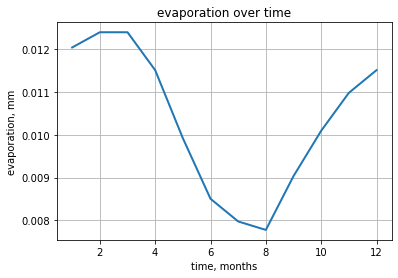

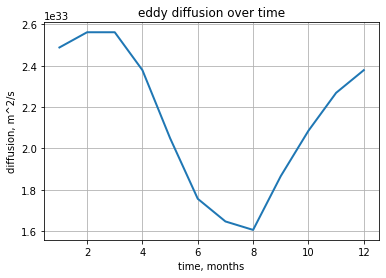

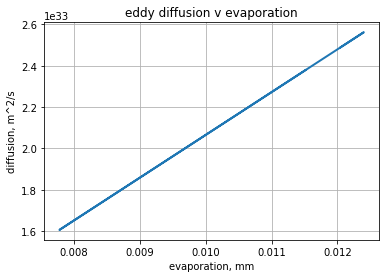

In [36]:
def eddydiff(k,wstarr,Z,Po,kstar,Ri):
    eddyd=[]
    for i in range(len(wstarr)):
        ediff= (((k*wstarr[i]*Z)/Po)*e**(-kstar*Z))*(1/(1+(37*Ri**2)))
        eddyd.append(ediff)
    return eddyd

eddy = eddydiff(k,wstarr,Z,Po,kstar,Ri)  #Henderson-Seller Eddy Diffusion Model, m^2/s 

#Boundary Conditions
surfB = (Kstar + Ldstar - Lu + Qe + Qh)/(km+eddy[0]) #neuman, derivative dT/dz = this
bottomB = 0 #neuman, derivative dT/dz = this

netshort = Kd*(1-As) #Net shortwave radiation at lake surface, W/m^2

def stefbolt(eps_a,sbconst,Ta): 
    sbl = []
    for i in range(len(Ta)):
        sb = (eps_a*sbconst)*(Ta[i])**4
        sbl.append(sb)
    return sbl

sblt=stefbolt(eps_a,sbconst,Ta) #Stefan-Boltzman law to approximate atmospheric longwave radiation, W/m^2

def longatm(sblt, A1):
    latm=[]
    for i in range(len(sblt)):
        la=(1-A1)*sblt[i]
        latm.append(la)
    return latm #Longwave radiation from the atmosphere at the lake surface, W/m^2

lngatm = longatm(sblt,A1)

longlake = e*sbconst*(Ts)**4  #longwave radiation emitted by lake, W/m^2

def evapmasst(N,U2,eo,ea):
    evapm=[]
    for i in range(len(U2)):
        em= N*U2[i]*(eo-ea)
        evapm.append(em)
    return evapm 

evap=evapmasst(N,U2,eo,ea) #Harbeck mass transfer model for evaporation, mm  
        
def latheatflux(rho2,Le,evap):
    lflx=[]
    for i in range(len(evap)):
        lf=rho2*Le*evap[i] 
        lflx.append(lf)
    return lflx 

latflux= latheatflux(rho2, Le, evap)   #Latent heat flux, W/m^2
       
def sensheatflux(R, latflux):
    shflux=[]
    for i in range(len(latflux)):
        sf=R*latflux[i]
        shflux.append(sf)
    return shflux

shflx= sensheatflux(R,latflux)  #Sensible Heat Flux, W/m^2



t=np.arange(1,13)
plt.figure()
plt.title("evaporation over time")
plt.grid()
plt.plot(t, evap, linewidth=2, label='')
plt.xlabel('time, months')
plt.ylabel('evaporation, mm')

plt.figure()
plt.title("eddy diffusion over time")
plt.grid()
plt.plot(t, eddy, linewidth=2, label='')
plt.xlabel('time, months')
plt.ylabel('diffusion, m^2/s')

plt.figure()
plt.title("eddy diffusion v evaporation")
plt.grid()
plt.plot(evap, eddy, linewidth=2, label='')
plt.xlabel('evaporation, mm')
plt.ylabel('diffusion, m^2/s')


Text(0, 0.5, 'depth')

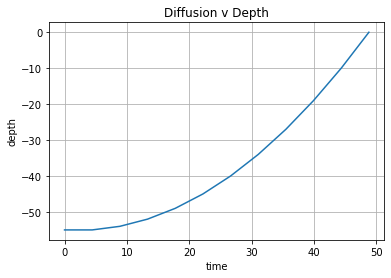

In [30]:
n = td  
dt = td/n # grid size for time (s)  
#dz = Z/n # grid size for space (m)
grid=np.linspace(0,Z,n)
dz=np.diff(grid)

data = np.array([np.ones(n), -2*np.ones(n), np.ones(n)])
diags = np.array([-1, 0, 1])
M = spdiags(data, diags, n, n).toarray()

M[0,0] = -1
M[0,1] = 1
M[-1,-1] = 1
M[-1,-2] = 0

R = np.ones(n).T
R[0] = dz[0]*surfB 
R[-1] = dz[0]*bottomB

T = np.linalg.inv(M)@R

plt.grid()
plt.title("Diffusion v Depth")
plt.plot(grid,T)
plt.xlabel('time')
plt.ylabel('depth')

#finite difference approximation for the 1D diffusion equation using FTCS replace last term (k)

In [22]:
def diffnum(eddy):
    return sum(eddy) / len(eddy)
difn= diffnum(eddy)

def diffusionCN(dz,nz,dt,nt,D,U,ntout,difn):  
    Uout = [] 
    diff = difn  # diffusion number
    A = spdiags([-0.5*diff, 1+diff, dz*surfB], [-1, 0, 1],shape=(nz-2, nz-2)).toarray()   #change bottom row to all zeros except 1 for last, , shape=(nz-2, nz-2)
    B1 = spdiags([0.5*diff, 1-diff, dz*bottomB],[-1, 0, 1],shape=(nz-2, nz-2)).toarray() #shape=(nz-2, nz-2)
    for n in range(1,nt): # second time step to last
        Un = U
        B = np.dot(Un[1:-1],B1)
        B[0] = B[0]+0.5*diff*(U2+U2)
        B[-1] = B[-1]+0.5*diff*(U3+U3)
        U[1:-1] = np.linalg.solve(A,B)
        Uout.append(U.copy()) 
    return Uout,diff,A

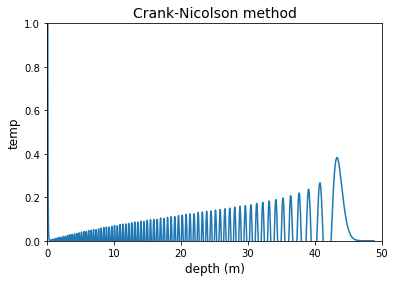

In [24]:
n = td  
dt = td/n # grid size for time (s) 
dz = Z/n # grid size for space (m)

U3=0
dt = td/n # grid size for time (s) 
dz = Z/n # grid size for space (m)
z = np.arange(0,Z+dz,dz) 
nz = len(z)
nt = 1000
#plt.figure(figsize=(7,5))
U = np.zeros(nz) # initial condition
U[0] = surfB
U[-1]= 0
Uout,diff,A = diffusionCN(dz,nz,dt,nt,km,U,U3,difn)

plt.plot(z,Uout[450])
plt.ylabel('temp',fontsize=12)
plt.xlim([0,50])
plt.ylim([0,1])
plt.xlabel('depth (m)',fontsize=12)
plt.title('Crank-Nicolson method',fontsize=14)
plt.show()